# Data Sampling of anon_disorder_tweets.csv

* We will clean our data and take a sample with the information we have gained through the EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../data/anon_disorder_tweets.csv')

In [2]:
df.columns

Index(['Unnamed: 0', 'artist', 'lyric', 'created_at', 'type', 'title',
       'user_id', 'src', 'disorder'],
      dtype='object')

In [3]:
df.drop(['Unnamed: 0'] ,axis=1, inplace=True)

In [59]:
df

,user_id,text,disorder
0,3f21058fc8,@amirulmokhtar Exactly! We were busy buat untu...,anxiety
1,3f21058fc8,Ternangis baca text &amp; dengar call reply di...,anxiety
2,3f21058fc8,I learn smthg very valuable today.\n\nWhen I w...,anxiety
3,3f21058fc8,"@MintKr Ohhh okay. So, to create more opportun...",anxiety
4,3f21058fc8,@MintKr Perspective expanding experience tu ap...,anxiety
...,...,...,...
32191363,c789b769d1,Peeps Don't forget to catch the braai show @SA...,bipolar
32191364,c789b769d1,@JohnnyGargano #fortheloveofGarganoway🔥💝,bipolar
32191365,c789b769d1,@Official_SABC1 @akaworldwide @malusi_gigaba D...,bipolar
32191366,c789b769d1,#TeamBreezyForever🔥💝💝😇#TeamBreezySA 🇿🇦💝#ChrisB...,bipolar


## dropping non_english  characters

In [60]:
import re

def is_english_text(text):
    """
    Check if a text contains predominantly English characters.
    Returns True if the text is mostly English, False otherwise.
    """
    # Regex to allow only English letters, numbers, and common punctuation
    english_regex = re.compile(r'^[\x00-\x7F]+$')  # Matches ASCII characters only
    return bool(english_regex.match(text))

# Sample list of tweets including Indian scripts
tweets = [
    "This is an English tweet!",
    "यह हिंदी में एक ट्वीट है",  # Hindi
    "123456789",  # Numbers only
    "Another English text with numbers 123!",
    "ఇది తెలుగు ట్వీట్",  # Telugu
]

# Filter only English texts
filtered_tweets = [tweet for tweet in tweets if is_english_text(tweet)]

print("Filtered Tweets:", filtered_tweets)


Filtered Tweets: ['This is an English tweet!', '123456789', 'Another English text with numbers 123!']


In [61]:
df.loc[df['text'].apply(is_english_text)]

,user_id,text,disorder
2,3f21058fc8,I learn smthg very valuable today.\n\nWhen I w...,anxiety
3,3f21058fc8,"@MintKr Ohhh okay. So, to create more opportun...",anxiety
4,3f21058fc8,@MintKr Perspective expanding experience tu ap...,anxiety
7,3f21058fc8,@TweetKellyTelly @zamrimohamad Baru nak tanya ...,anxiety
9,3f21058fc8,@_arares Paling senang buat je. Selamat dunia ...,anxiety
...,...,...,...
32191341,c789b769d1,"""In Order For Good Things To Come Your Way , Y...",bipolar
32191344,c789b769d1,If you a guy/man reading this... Please treat ...,bipolar
32191347,c789b769d1,"Someone said, ""Don't be afraid to start over a...",bipolar
32191352,c789b769d1,"""As you start and end your day,be thankful for...",bipolar


In [62]:
df = df.loc[df['text'].apply(is_english_text)]

# removing links and mentions

In [63]:
def remove_mentions(text):
    """
    Remove Twitter usernames from a text.
    """
    # Regex pattern for mentions
    pattern = re.compile(r'@[A-Za-z0-9_]{1,15}')
    return pattern.sub('', text)

def remove_urls(text):
    """
    Remove URLs from a text.
    """
    # Regex pattern for URLs
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub('', text)

# Sample text with mentions and URLs
text = "Hello @world! Check out this link: https://www.world.com"

# Remove mentions and URLs
text = remove_mentions(text)
print("Text after removing mentions:", text)

text = remove_urls(text)
print("Text after removing URLs:", text)

def remove_mentions_urls(text):
    """
    Remove mentions and URLs from a text.
    """
    text = remove_mentions(text)
    text = remove_urls(text)
    return text

Text after removing mentions: Hello ! Check out this link: https://www.world.com
Text after removing URLs: Hello ! Check out this link: 


In [64]:
df['text'] = df['text'].apply(remove_mentions_urls)

/var/folders/v1/j0gp03d94595_00spx0xzcd40000gn/T/ipykernel_97753/2850023933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_mentions_urls)


## dropping to long or too short texts

In [65]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

df['char_count'] = df['text'].apply(len)

df['word_count'].describe()

/var/folders/v1/j0gp03d94595_00spx0xzcd40000gn/T/ipykernel_97753/2404797699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text'].apply(lambda x: len(x.split()))
/var/folders/v1/j0gp03d94595_00spx0xzcd40000gn/T/ipykernel_97753/2404797699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count'] = df['text'].apply(len)


count    2.095630e+07
mean     1.267054e+01
std      1.265843e+01
min      0.000000e+00
25%      4.000000e+00
50%      8.000000e+00
75%      1.700000e+01
max      1.400000e+02
Name: word_count, dtype: float64

<Axes: title={'center': 'Word Count Distribution'}, ylabel='Frequency'>

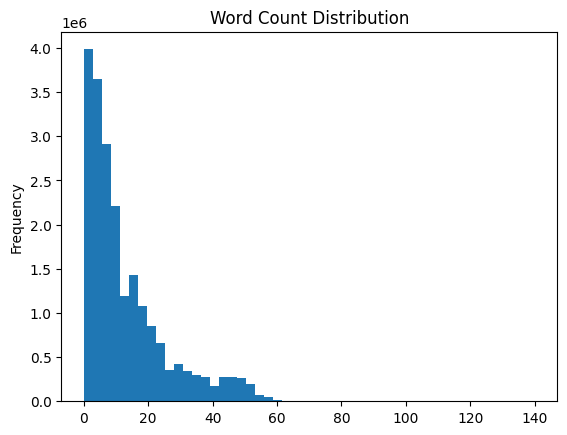

In [66]:
df['word_count'].plot(kind='hist', bins=50, title='Word Count Distribution')

<Axes: title={'center': 'Character Count Distribution'}, ylabel='Frequency'>

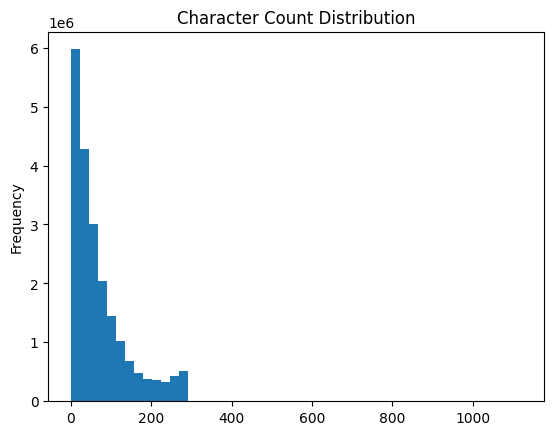

In [67]:
df['char_count'].plot(kind='hist', bins=50, title='Character Count Distribution')

## drop the texts with char count lower than 50, greater than 300

In [68]:
d1 = df[df['char_count']>=50]
d1

,user_id,text,disorder,word_count,char_count
2,3f21058fc8,I learn smthg very valuable today.\n\nWhen I w...,anxiety,45,284
3,3f21058fc8,"Ohhh okay. So, to create more opportunities, ...",anxiety,26,162
9,3f21058fc8,Paling senang buat je. Selamat dunia akhirat ...,anxiety,11,74
10,3f21058fc8,I couldn't sleep. Figured out I need more stim...,anxiety,46,242
11,3f21058fc8,No reason to give up.\nNo reason to stop hustl...,anxiety,23,125
...,...,...,...,...,...
32191341,c789b769d1,"""In Order For Good Things To Come Your Way , Y...",bipolar,17,85
32191344,c789b769d1,If you a guy/man reading this... Please treat ...,bipolar,21,161
32191347,c789b769d1,"Someone said, ""Don't be afraid to start over a...",bipolar,20,123
32191352,c789b769d1,"""As you start and end your day,be thankful for...",bipolar,30,228


In [69]:
d2 = d1[d1['char_count']<=150]
d2

,user_id,text,disorder,word_count,char_count
9,3f21058fc8,Paling senang buat je. Selamat dunia akhirat ...,anxiety,11,74
11,3f21058fc8,No reason to give up.\nNo reason to stop hustl...,anxiety,23,125
14,3f21058fc8,"Back to basic, dengar strategy sharing tuan a...",anxiety,17,114
15,3f21058fc8,Yup. it's thing for their peers. Sekolah lain...,anxiety,14,82
18,3f21058fc8,Yes please! I have a lot of important HR ques...,anxiety,13,62
...,...,...,...,...,...
32191331,c789b769d1,"You Were Given,\nTHIS LIFE.\nBecause You Are S...",bipolar,15,99
32191334,c789b769d1,"""In Order To Succeed greatly, You Have To Be P...",bipolar,15,107
32191340,c789b769d1,"Good morning,It has taught me that Self car...",bipolar,14,95
32191341,c789b769d1,"""In Order For Good Things To Come Your Way , Y...",bipolar,17,85


In [70]:
## intersect d1 and d2

d3 = d1.merge(d2, how='inner')
d3

,user_id,text,disorder,word_count,char_count
0,3f21058fc8,Paling senang buat je. Selamat dunia akhirat ...,anxiety,11,74
1,3f21058fc8,No reason to give up.\nNo reason to stop hustl...,anxiety,23,125
2,3f21058fc8,"Back to basic, dengar strategy sharing tuan a...",anxiety,17,114
3,3f21058fc8,Yup. it's thing for their peers. Sekolah lain...,anxiety,14,82
4,3f21058fc8,Yes please! I have a lot of important HR ques...,anxiety,13,62
...,...,...,...,...,...
10140678,c789b769d1,"You Were Given,\nTHIS LIFE.\nBecause You Are S...",bipolar,15,99
10140679,c789b769d1,"""In Order To Succeed greatly, You Have To Be P...",bipolar,15,107
10140680,c789b769d1,"Good morning,It has taught me that Self car...",bipolar,14,95
10140681,c789b769d1,"""In Order For Good Things To Come Your Way , Y...",bipolar,17,85


In [71]:
d3['char_count'].describe()

count    1.014068e+07
mean     8.454324e+01
std      2.670647e+01
min      5.000000e+01
25%      6.200000e+01
50%      7.700000e+01
75%      1.070000e+02
max      1.500000e+02
Name: char_count, dtype: float64

In [72]:
d3['word_count'].describe()

count    1.014068e+07
mean     1.450600e+01
std      5.752945e+00
min      0.000000e+00
25%      1.100000e+01
50%      1.300000e+01
75%      1.800000e+01
max      7.100000e+01
Name: word_count, dtype: float64

<Axes: title={'center': 'Word Count Distribution'}, ylabel='Frequency'>

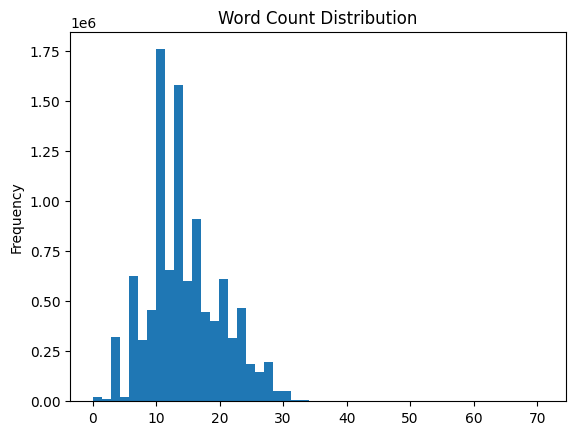

In [73]:
d3['word_count'].plot(kind='hist', bins=50, title='Word Count Distribution')

## dropping based on word count, between 5 and 30

In [88]:
d3 = d3[d3['word_count']<=30]
d3

,user_id,text,disorder,word_count,char_count,text_len
0,3f21058fc8,Paling senang buat je. Selamat dunia akhirat ...,anxiety,11,74,74
1,3f21058fc8,No reason to give up.\nNo reason to stop hustl...,anxiety,23,125,125
2,3f21058fc8,"Back to basic, dengar strategy sharing tuan a...",anxiety,17,114,114
3,3f21058fc8,Yup. it's thing for their peers. Sekolah lain...,anxiety,14,82,82
4,3f21058fc8,Yes please! I have a lot of important HR ques...,anxiety,13,62,62
...,...,...,...,...,...,...
10140678,c789b769d1,"You Were Given,\nTHIS LIFE.\nBecause You Are S...",bipolar,15,99,99
10140679,c789b769d1,"""In Order To Succeed greatly, You Have To Be P...",bipolar,15,107,107
10140680,c789b769d1,"Good morning,It has taught me that Self car...",bipolar,14,95,95
10140681,c789b769d1,"""In Order For Good Things To Come Your Way , Y...",bipolar,17,85,85


In [89]:
d3 = d3[d3['word_count']>=5]
d3

,user_id,text,disorder,word_count,char_count,text_len
0,3f21058fc8,Paling senang buat je. Selamat dunia akhirat ...,anxiety,11,74,74
1,3f21058fc8,No reason to give up.\nNo reason to stop hustl...,anxiety,23,125,125
2,3f21058fc8,"Back to basic, dengar strategy sharing tuan a...",anxiety,17,114,114
3,3f21058fc8,Yup. it's thing for their peers. Sekolah lain...,anxiety,14,82,82
4,3f21058fc8,Yes please! I have a lot of important HR ques...,anxiety,13,62,62
...,...,...,...,...,...,...
10140678,c789b769d1,"You Were Given,\nTHIS LIFE.\nBecause You Are S...",bipolar,15,99,99
10140679,c789b769d1,"""In Order To Succeed greatly, You Have To Be P...",bipolar,15,107,107
10140680,c789b769d1,"Good morning,It has taught me that Self car...",bipolar,14,95,95
10140681,c789b769d1,"""In Order For Good Things To Come Your Way , Y...",bipolar,17,85,85


In [90]:
d3['text_len'] = d3['text'].apply(len)

d3['text_len'].describe()

count    9.754872e+06
mean     8.507560e+01
std      2.672162e+01
min      5.000000e+01
25%      6.200000e+01
50%      7.800000e+01
75%      1.080000e+02
max      1.500000e+02
Name: text_len, dtype: float64

<Axes: title={'center': 'Text Length Distribution'}, ylabel='Frequency'>

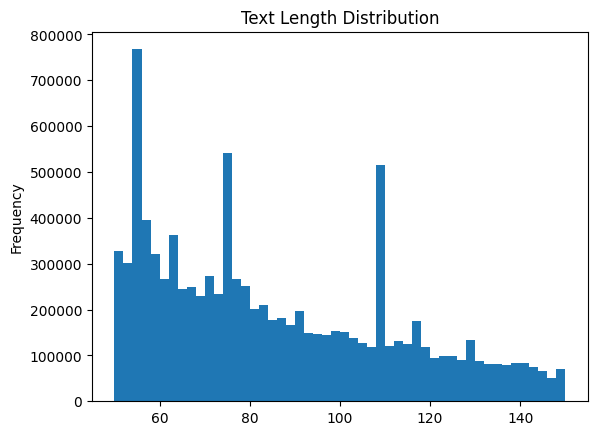

In [91]:
d3['text_len'].plot(kind='hist', bins=50, title='Text Length Distribution')

<Axes: title={'center': 'Word Count Distribution'}, ylabel='Frequency'>

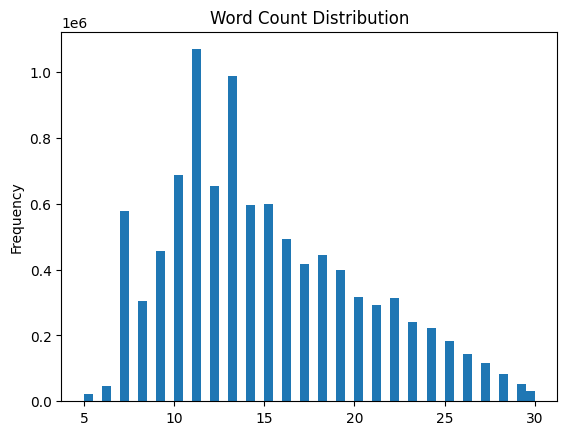

In [92]:
d3['word_count'].plot(kind='hist', bins=50, title='Word Count Distribution')

## dropping based on number of tweets per user

In [93]:
tweets_per_user = d3.groupby('user_id')['text'].count()
tweets_per_user_class = d3.groupby(['user_id', 'disorder'])['text'].count()

<Axes: title={'center': 'Tweets per User Distribution'}, ylabel='Frequency'>

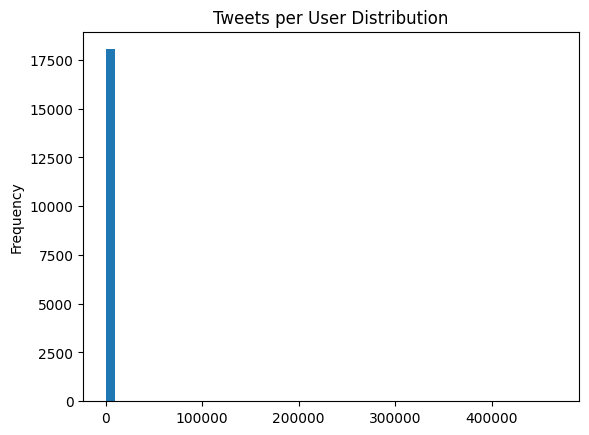

In [94]:
tweets_per_user.plot(kind='hist', bins=50, title='Tweets per User Distribution')

<Axes: title={'center': 'Tweets per User Distribution'}, ylabel='Frequency'>

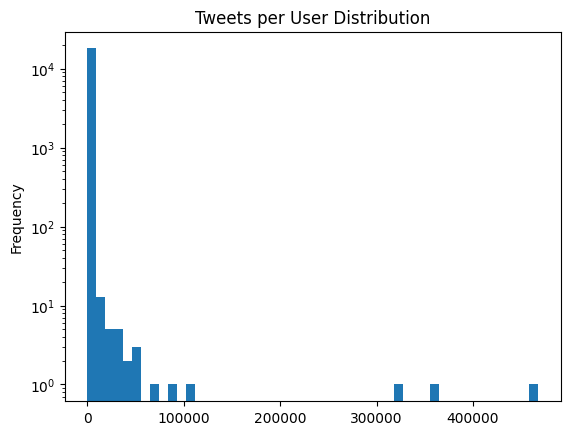

In [95]:
## make it log scale
tweets_per_user.plot(kind='hist', bins=50, title='Tweets per User Distribution', log=True)


In [99]:
tweets_per_user.describe()

count     18074.000000
mean        539.718491
std        5273.248956
min           1.000000
25%         127.000000
50%         302.000000
75%         579.000000
max      467414.000000
Name: text, dtype: float64

In [106]:
tweets_per_user[tweets_per_user <300].value_counts()

text
1      107
2       81
3       76
5       65
8       62
      ... 
111     16
293     16
140     16
296     15
280     14
Name: count, Length: 299, dtype: int64

<Axes: title={'center': 'Tweets per User Distribution'}, ylabel='Frequency'>

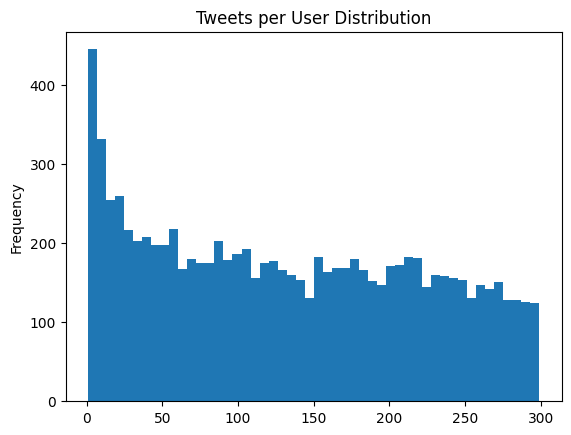

In [107]:
tweets_per_user[tweets_per_user <300].plot(kind='hist', bins=50, title='Tweets per User Distribution')

In [108]:
## filter out users with more than 300 tweets
d4 = d3[d3['user_id'].isin(tweets_per_user[tweets_per_user <300].index)]

In [110]:
d4

,user_id,text,disorder,word_count,char_count,text_len
2683,a09ed9ede4,Do people on onlyfans like masc lesbians that ...,anxiety,26,136,136
2684,a09ed9ede4,You're gonna get married long before any of u...,anxiety,10,52,52
2685,a09ed9ede4,I also didnt take my ADHD meds today bc I lite...,anxiety,23,112,112
2686,a09ed9ede4,I woke up the sickest I've been in a long time...,anxiety,28,129,129
2687,a09ed9ede4,Why are so many people my age dating high scho...,anxiety,15,72,72
...,...,...,...,...,...,...
10140678,c789b769d1,"You Were Given,\nTHIS LIFE.\nBecause You Are S...",bipolar,15,99,99
10140679,c789b769d1,"""In Order To Succeed greatly, You Have To Be P...",bipolar,15,107,107
10140680,c789b769d1,"Good morning,It has taught me that Self car...",bipolar,14,95,95
10140681,c789b769d1,"""In Order For Good Things To Come Your Way , Y...",bipolar,17,85,85


In [111]:
d4['disorder'].value_counts()

disorder
depression    553266
anxiety       256292
ptsd          239023
bipolar        93085
borderline     29449
panic          18493
Name: count, dtype: int64

In [112]:
d4

,user_id,text,disorder,word_count,char_count,text_len
2683,a09ed9ede4,Do people on onlyfans like masc lesbians that ...,anxiety,26,136,136
2684,a09ed9ede4,You're gonna get married long before any of u...,anxiety,10,52,52
2685,a09ed9ede4,I also didnt take my ADHD meds today bc I lite...,anxiety,23,112,112
2686,a09ed9ede4,I woke up the sickest I've been in a long time...,anxiety,28,129,129
2687,a09ed9ede4,Why are so many people my age dating high scho...,anxiety,15,72,72
...,...,...,...,...,...,...
10140678,c789b769d1,"You Were Given,\nTHIS LIFE.\nBecause You Are S...",bipolar,15,99,99
10140679,c789b769d1,"""In Order To Succeed greatly, You Have To Be P...",bipolar,15,107,107
10140680,c789b769d1,"Good morning,It has taught me that Self car...",bipolar,14,95,95
10140681,c789b769d1,"""In Order For Good Things To Come Your Way , Y...",bipolar,17,85,85


<Axes: title={'center': 'Panic Disorder Word Count Distribution'}, ylabel='Frequency'>

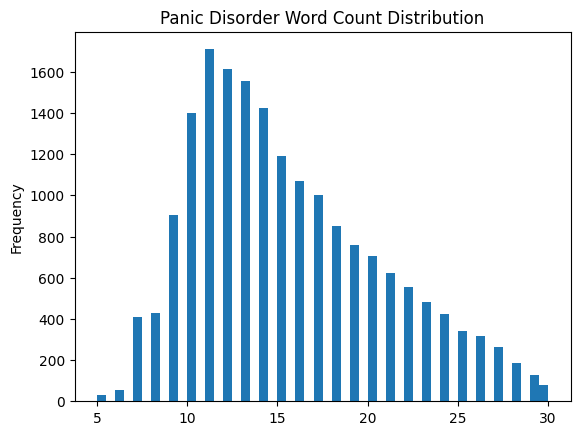

In [115]:
d4[d4['disorder'] == 'panic'].word_count.plot(kind='hist', bins=50, title='Panic Disorder Word Count Distribution')

In [117]:
d4.disorder.value_counts()

disorder
depression    553266
anxiety       256292
ptsd          239023
bipolar        93085
borderline     29449
panic          18493
Name: count, dtype: int64

# sample based on class dsitribution

In [141]:
## sample 10.000 tweets from each class, while keeping every unique user id

d5 = d4.groupby('disorder').apply(lambda x: x.sample(10000)).reset_index(drop=True)

In [142]:
d5

,user_id,text,disorder,word_count,char_count,text_len
0,96a0386390,Times have changed now Marion we use somethi...,anxiety,23,113,113
1,19c057a617,He has done some good things regardless of h...,anxiety,10,56,56
2,5e6675bfee,"Even if we fight a lot, I still want you in my...",anxiety,13,51,51
3,166b8a2abe,I never liked cilantro before &amp; actually...,anxiety,19,103,103
4,b4fde68e4d,"I've resorted to saying ""I'm ok"" when anyone a...",anxiety,18,86,86
...,...,...,...,...,...,...
59995,ff636b39ee,\n\n#MentalHealthAwareness \n...,ptsd,5,108,108
59996,3799f77d9e,"Hi, I'm Spider Cat.\nIt was this or Migraine S...",ptsd,12,64,64
59997,3dfef3d920,So do we still believe that Enrico Tarrio was...,ptsd,17,78,78
59998,12a95b032b,No matter how bad we ended if you ever need an...,ptsd,15,79,79


In [143]:
d4[d4.disorder == 'panic'].user_id.nunique()

129

In [144]:
data = d5

In [145]:
classes_per_user = data.groupby('user_id')['disorder'].nunique()
two_disorders = classes_per_user[classes_per_user==2].index

In [146]:
ratios = data[data['user_id'].isin(two_disorders)].groupby('user_id')['disorder'].value_counts()/data[data['user_id'].isin(two_disorders)].groupby('user_id')['disorder'].count()

<Axes: >

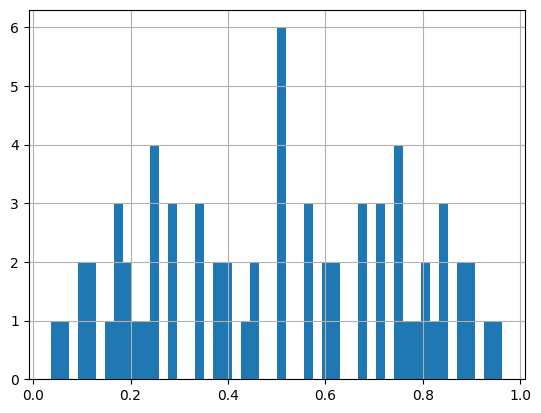

In [147]:
ratios.hist(bins=50)

In [148]:
data.user_id.nunique()

7421

In [149]:
d5

,user_id,text,disorder,word_count,char_count,text_len
0,96a0386390,Times have changed now Marion we use somethi...,anxiety,23,113,113
1,19c057a617,He has done some good things regardless of h...,anxiety,10,56,56
2,5e6675bfee,"Even if we fight a lot, I still want you in my...",anxiety,13,51,51
3,166b8a2abe,I never liked cilantro before &amp; actually...,anxiety,19,103,103
4,b4fde68e4d,"I've resorted to saying ""I'm ok"" when anyone a...",anxiety,18,86,86
...,...,...,...,...,...,...
59995,ff636b39ee,\n\n#MentalHealthAwareness \n...,ptsd,5,108,108
59996,3799f77d9e,"Hi, I'm Spider Cat.\nIt was this or Migraine S...",ptsd,12,64,64
59997,3dfef3d920,So do we still believe that Enrico Tarrio was...,ptsd,17,78,78
59998,12a95b032b,No matter how bad we ended if you ever need an...,ptsd,15,79,79


In [150]:
d5.to_csv('data/cleaned_anon_disorder_tweets.csv', index=False)